— The essence of entropy —

Entropy is a measure of uncertainty or randomness in a set of data. The higher the randomness, the greater the entropy. For example, uniformly distributed outcomes (equal probabilities among outcomes) result in maximum entropy. Entropy is a fundamental concept in data science and plays a major role in decision trees for selecting the best feature to split data, maximizing information gain, and minimizing uncertainty. Here, you can find entropy computed for several 4-outcome random variables, depicting how entropy increases in the direction of chaos. The reported entropy is normalized. We divide each resulted entropy by the maximum entropy possible; log2(n), where n is the number of possible outcomes.

In [45]:
import math 

def entropy(probabilities):
    '''
    . Compute entropy of a radnom variable given its probability distribution
    . Normalize entropy to [0,1] range
    '''
    curated_probabilities = [1e-10 if p == 0.0 else p for p in probabilities] #avoid math domain error when p = 0.0
    e = -sum(p * math.log2(p) for p in curated_probabilities)
    n = len(curated_probabilities)
    max_e = math.log2(n)
    normalized_e = e/max_e

    return normalized_e

probabilities = [0.25,0.25,0.25,0.25]

print(f'entropy([0.25,0.25,0.25,0.25]) = {entropy(probabilities):.4f}')  # test entropy function 

entropy([0.25,0.25,0.25,0.25]) = 1.0000


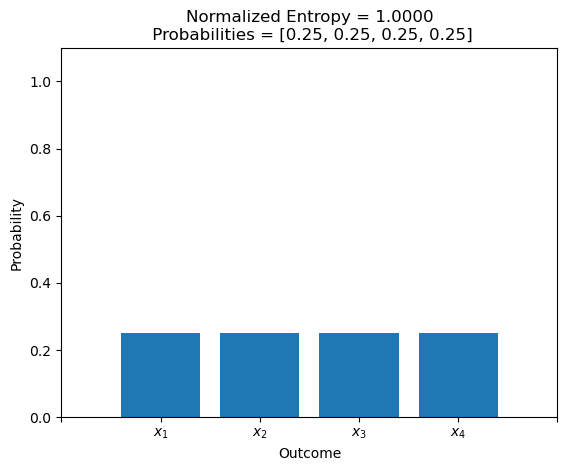

In [48]:
# Animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import warnings
warnings.filterwarnings('ignore')

probabilities = [
    [1.0, 0.0, 0.0, 0.0],
    [0.6, 0.4, 0.0, 0.0],
    [0.5, 0.4, 0.1, 0.0],
    [0.4, 0.3, 0.2, 0.1],
    [0.25, 0.25, 0.25, 0.25]
]
fig, ax = plt.subplots()
bars = ax.bar(range(1, len(probabilities[0]) + 1), probabilities[0])

def init():
    ax.set_xlim(0, len(probabilities[0]) + 1)
    ax.set_xticklabels(['', '$%s$' %r'x_1', '$%s$' %r'x_2', '$%s$' %r'x_3', '$%s$' %r'x_4', ''])
    ax.set_ylim(0, 1.1)
    ax.set_xlabel('Outcome')
    ax.set_ylabel('Probability')
    ax.set_title('Normalized Entropy')
    return bars

def update(frame):
    for bar, h in zip(bars, probabilities[frame]):
        bar.set_height(h)
    
    ax.set_title(f'Normalized Entropy = {entropy(probabilities[frame]):.4f}' + f'\n Probabilities = {probabilities[frame]}')
    return bars

animation = FuncAnimation(fig, update, frames=len(probabilities), init_func=init, blit=True, interval=5)

animation.save('entropy.mp4', writer='ffmpeg', fps=0.5 , dpi = 300)

plt.show()